# SSOpy - A solar system object propagator in python


This notebook demonstrates a python based solar system object propagator.
Requires JPL DExxx ephemeris files as well as spiceypy.

S. Eggl 20200601

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import ssopy as prop

In [4]:
import jpl_query as jq

Inspect header from JPL DE430 ephemeris file.

In [5]:
prop.readEphemerisHeader(prop.spkFiles[0])

['JPL planetary and lunar ephemeris DE430',
 'Integrated 29 March 2013',
 'Documented in JPL Interplanetary Network Progress Report 42-196',
 'http://ipnpr.jpl.nasa.gov/progress_report/42-196/196C.pdf',
 '15 February 2014',
 'Time span covered by ephemeris:',
 '1549-DEC-21 00:00 to   2650-JAN-25 00:00',
 'JD   2287184.50   to   JD   2688976.50',
 'Bodies included:',
 '        MERCURY BARYCENTER (1)  SATURN BARYCENTER (6)   MERCURY (199)',
 '        VENUS BARYCENTER (2)    URANUS BARYCENTER (7)   VENUS (299)',
 '        EARTH BARYCENTER (3)    NEPTUNE BARYCENTER (8)  MOON (301)',
 '        MARS BARYCENTER (4)     PLUTO BARYCENTER (9)    EARTH (399)',
 '        JUPITER BARYCENTER (5)  SUN (10)',
 'Mass parameter (GM) for Sun, Moon, and Planets:',
 '            AU**3/DAY**2                    GMSun/GM(I)         KM**3/SEC**2',
 '   GM1     0.491248045036476000D-10      6023682.155592           22031.780000',
 '   GM2     0.724345233264412000D-09       408523.718658          324858.592000'

Get initial conditions for the asteroid Didymos from JPL Horizons webserver.

In [6]:
#TARGET ASTEROID IDENTIFIER FOR JPL QUERY
tname='Didymos'

In [7]:
#QUERY JPL FOR ORBITAL ELEMENTS AND COVARIANCE MATRIX
jq_result=jq.query_cometary_ele_and_cov(tname)

In [8]:
#EPOCH FOR ORBITAL ELEMENTS AND COVARIANCE MATRIX (JD)
epoch=jq_result[0]

In [9]:
#COMETARY ORBITAL ELEMENTS [e,q,tp(JD),node(deg),peri(deg),inc(deg)]
com=np.array(jq_result[1])

In [10]:
#TRANSFORM TO CARTESIAN STATE 
cart=jq.cometary2cartesian(epoch,com)

In [11]:
epochmjd=epoch-2400000.5


Define propagation interval.

In [12]:
t = np.linspace(epochmjd, 59857.0, 1000)

Propagate state

In [13]:
[t_sol0, sol0]=prop.propagate_nbody(cart,epochmjd,t[1:])

In [14]:
sol0

array([[ 9.45275726e-01,  3.75116837e-01, -4.74599963e-02,
        -8.32049499e-03,  1.82070283e-02,  7.87135275e-04],
       [ 9.11326210e-01,  4.44349307e-01, -4.43354319e-02,
        -9.32097889e-03,  1.77649137e-02,  8.36441307e-04],
       [ 8.73584975e-01,  5.11731321e-01, -4.10270149e-02,
        -1.02897705e-02,  1.72457530e-02,  8.82617567e-04],
       ...,
       [ 8.22367773e-01, -1.07701415e+00, -6.57135023e-02,
         8.43069490e-03,  1.36029110e-02, -2.44216671e-04],
       [ 8.54067518e-01, -1.02374015e+00, -6.65949955e-02,
         8.04037331e-03,  1.40871371e-02, -2.13646826e-04],
       [ 8.84200232e-01, -9.68606880e-01, -6.73552244e-02,
         7.61589738e-03,  1.45689756e-02, -1.81175647e-04]])

Plot solution in state space.

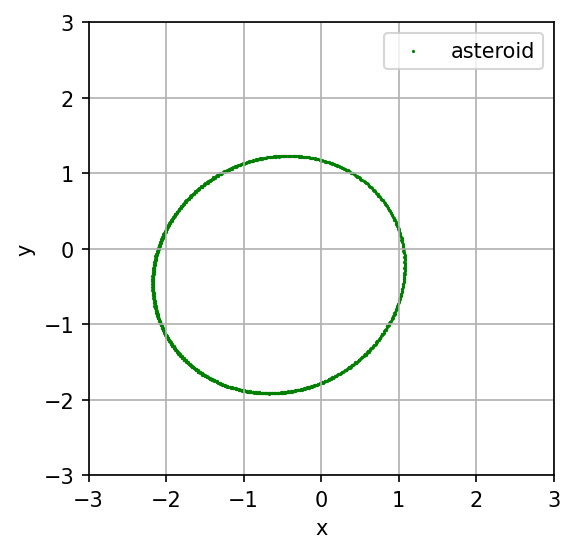

In [15]:
plt.figure(dpi=150,figsize=(4,4))
plt.scatter(sol0[:, 0],sol0[:, 1], color='g', label='asteroid', s=0.3)
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.grid()

plt.show()

Plot solution in orbital element space.

In [16]:
orbital_elements=[]
for i in range(len(t_sol0)):
    orbital_elements.append(jq.cartesian2keplerian(t_sol0[i],sol0[i])[0])

In [17]:
orbital_elements[0]

[1.6443101097772652,
 0.38393203178402174,
 3.4080850415364776,
 319.2450713457228,
 73.23923913119975,
 355.5092430015925]

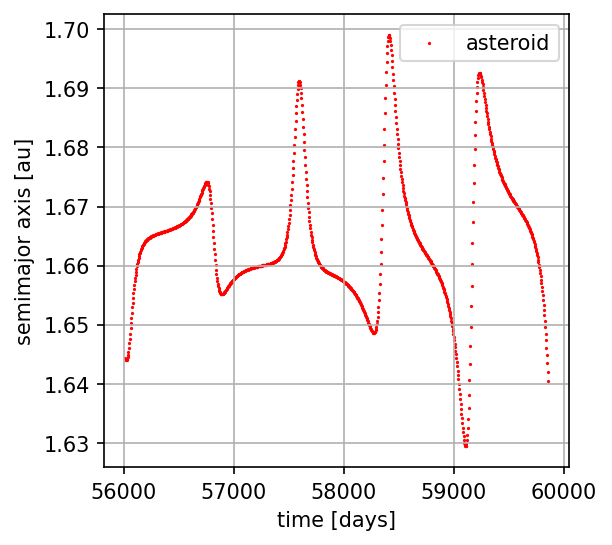

In [18]:
plt.figure(dpi=150,figsize=(4,4))
plt.scatter(t_sol0,np.array(orbital_elements)[:,0], color='r', label='asteroid', s=0.3)
plt.legend(loc='best')
plt.ylabel('semimajor axis [au]')
plt.xlabel('time [days]')
plt.grid()
plt.show()

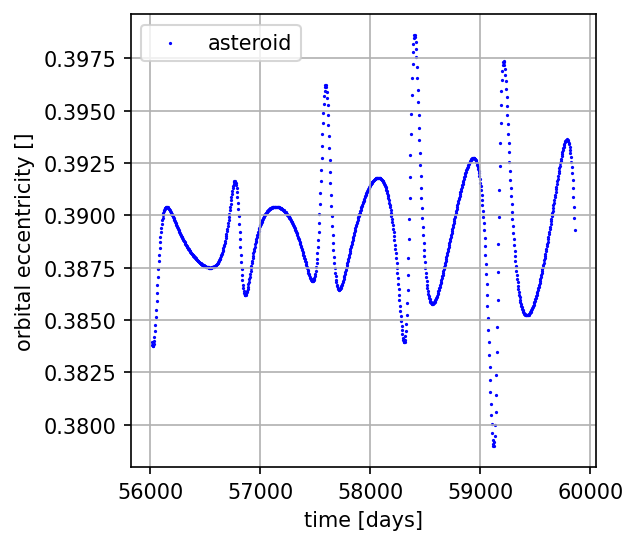

In [19]:
plt.figure(dpi=150,figsize=(4,4))
plt.scatter(t_sol0,np.array(orbital_elements)[:,1], color='b', label='asteroid', s=0.3)
plt.legend(loc='best')
plt.ylabel('orbital eccentricity []')
plt.xlabel('time [days]')
plt.grid()
plt.show()